# Decision Tree

# Import nesseccary library

In [1]:
#IMPORT LIBRARIES

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# Credit Risk
Credit risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. If a company offers credit to its client, then there is a risk that its client may not pay their invoices.

When a bank receives a loan application, they have to make a decision regarding whether to proceed with the loan approval or not, based on the applicant's profile, and

**Types of credit risk**
# Good Risk
An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.

# Bad Risk
A loan that is unlikely to be repaid because of bad credit history,insufficient income,or some other reson.A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.

# Problem Statment
This German Credit score data, In this dataset each entry represent a person who take a credit by bank,Each person classified as good or bad credit risk according to the set of attributes.

In [2]:
df_credit=pd.read_csv("F:\Python\credit.csv")
df_credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


# Data Overview

**checking_balance:**status of exisiting checking balance(DM or D-mark--Deutsche mark it's official currency of west germany)

- 1 DEM- 41.8338 INR
- '< 0 DM', '1 - 200 DM', 'unknown', '> 200 DM'/salary at least one year

**months_loan_duration:**Loan Duration in month

**credit_history:**Credit history

- 'critical-other credits existing(not at this bank)', 
- 'poor-delay in paying off in the past',
- 'good-existing credits paid back duly till now',
- 'very good-all credits at this bank paid back duly'
- 'perfect-no credits taken/all credits paid back duly', 
 
**purpose:**Purpose of loan

- 'furniture/appliances', 'education', 'car', 'business','renovations', 'car0'

**amount:**Credit amount(that amount paid to the bank or company)

**savings_balance:**Saving account balance

- 'unknown', '< 100 DM', '500 - 1000 DM', '> 1000 DM','100 - 500 DM'

**employment_duration:**Present employment since

- '> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed','< 1 year'

**percent_of_income:**Installment rate in percentage of disposable income(disposable income is the amount of money left to spend and save after income tax has been calculated)(it ensure that your total outgo on EMIs does not exceed certain percentage limit of your take salary/income)

- 1 = >= 35 %
- 2 = 25 <= … < 35%
- 3 = 20 <= … < 25%
- 4 = < 20%

**years_at_residence:**Year of residence

- 1= < 1 yr 
- 2 = 1 <= … < 4 yrs
- 3 = 4 <= … < 7 yrs 
- 4 = >= 7 yrs


**age:** Age in years

**other_credit:**Other installment plans

- 'none', 'bank', 'store'

**housing:**House status

- 'own', 'other', 'rent'

**existing_loans_count:**Number of existing loan installment

- 1 = 1
- 2 = 2-3 
- 3 = 4-5 
- 4 = >= 6

**job:**job status

- 'skilled', 'unskilled', 'management', 'unemployed'

**dependents:**Number of people being liable to provide maintenance for(the maintenance law in india lays down the duty of a man to provide maintenance to his parents to his parents,wife, and children when they unable to maintenance themselves)
- Number of persons who financially depend on the debtor

- 1 = 3 or more 
- 2 = 0 to 2

**phone:**Phone or not

- yes,no

**default:**Cost matrix(Risk)-(No)Good Risk -(YES)Bad Risk

In [3]:
df_credit.shape

(1000, 17)

**Interpretation:**The dataset contains 1000 row and 17 attributes.

In [3]:
# change columns name for better understanding
df_credit.rename(columns={'checking_balance':'Checking_Balance',
                 'months_loan_duration':'Loan_Duration_In_Month',
                 'credit_history':'Credit_History',
                 'purpose':'Loan_Purpose',
                 'amount':'Credit_Amount',
                 'savings_balance':'Saving_Account_Balance',
                 'employment_duration':'Present_Employment_Since',
                 'percent_of_income':'Installment_Rent_In_Percent_Of_Income',
                 'years_at_residence':'Present_Residual_Since',
                 'age':'Age',
                 'other_credit':'Other_Installment_Plans',
                 'housing':'Housing_Status',
                 'existing_loans_count':'Number_Of_Existing_Loan_Installment',
                 'job':'Job',
                 'dependents':'Number_Of_Person_Financially_Depend_to_debtor',
                 'phone':'Phone_Have_Or_Not',
                 'default':'Credit_Risk'},inplace=True)
df_credit.head()

,Checking_Balance,Loan_Duration_In_Month,Credit_History,Loan_Purpose,Credit_Amount,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Age,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not,Credit_Risk
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
# change value of data
df_credit.replace({"Loan_Purpose":{"car":"car(new)","car0":"car(old)"},
                  "Installment_Rent_In_Percent_Of_Income":{1:'>= 35%',2:'25% - 35%',3:'25% - 20%',4:'<= 20%'},
                  "Present_Residual_Since":{1:" < 1 yrs",2:" 1 - 4 yrs",3:"4 - 7 yrs",4:" > 7 yrs"},
                  "Number_Of_Existing_Loan_Installment":{1:"1",2:"2 - 3",3:"4 - 5",4:">=6"},
                   "Number_Of_Person_Financially_Depend_to_debtor":{1:" >= 3 people",2:"0 - 2 people"},
                   "Credit_Risk":{"no":"Good Risk","yes":'Bad Risk'}
                  },inplace=True)
df_credit.head()

,Checking_Balance,Loan_Duration_In_Month,Credit_History,Loan_Purpose,Credit_Amount,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Age,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not,Credit_Risk
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,<= 20%,> 7 yrs,67,none,own,2 - 3,skilled,>= 3 people,yes,Good Risk
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,25% - 35%,1 - 4 yrs,22,none,own,1,skilled,>= 3 people,no,Bad Risk
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,25% - 35%,4 - 7 yrs,49,none,own,1,unskilled,0 - 2 people,no,Good Risk
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,25% - 35%,> 7 yrs,45,none,other,1,skilled,0 - 2 people,no,Good Risk
4,< 0 DM,24,poor,car(new),4870,< 100 DM,1 - 4 years,25% - 20%,> 7 yrs,53,none,other,2 - 3,skilled,0 - 2 people,no,Bad Risk


In [5]:
df_credit.info() #data have not null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Checking_Balance                               1000 non-null   object
 1   Loan_Duration_In_Month                         1000 non-null   int64 
 2   Credit_History                                 1000 non-null   object
 3   Loan_Purpose                                   1000 non-null   object
 4   Credit_Amount                                  1000 non-null   int64 
 5   Saving_Account_Balance                         1000 non-null   object
 6   Present_Employment_Since                       1000 non-null   object
 7   Installment_Rent_In_Percent_Of_Income          1000 non-null   object
 8   Present_Residual_Since                         1000 non-null   object
 9   Age                                            1000 non-null   i

**Interpretation:**Dataset not contain null value.

In [5]:
df_credit.describe().T #data have not much outlier

,count,mean,std,min,25%,50%,75%,max
Loan_Duration_In_Month,1000.000000,20.903000,12.058814,4.000000,12.000000,18.000000,24.000000,72.000000
Credit_Amount,1000.000000,3271.258000,2822.736876,250.000000,1365.500000,2319.500000,3972.250000,18424.000000
Age,1000.000000,35.546000,11.375469,19.000000,27.000000,33.000000,42.000000,75.000000


**Interpretation:**Statistics Summary of data and after observing mean and median we see that data not much contain outliers.

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Checking_Balance', ylabel='count'>

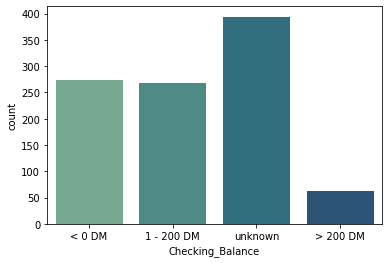

In [5]:
sns.countplot('Checking_Balance',palette='crest',data=df_credit)

**Interpretation:**Here we see that unknown count is more i.e. no checking account is more comapre to other and >200 DM account balance customer less

<AxesSubplot:xlabel='Loan_Duration_In_Month', ylabel='count'>

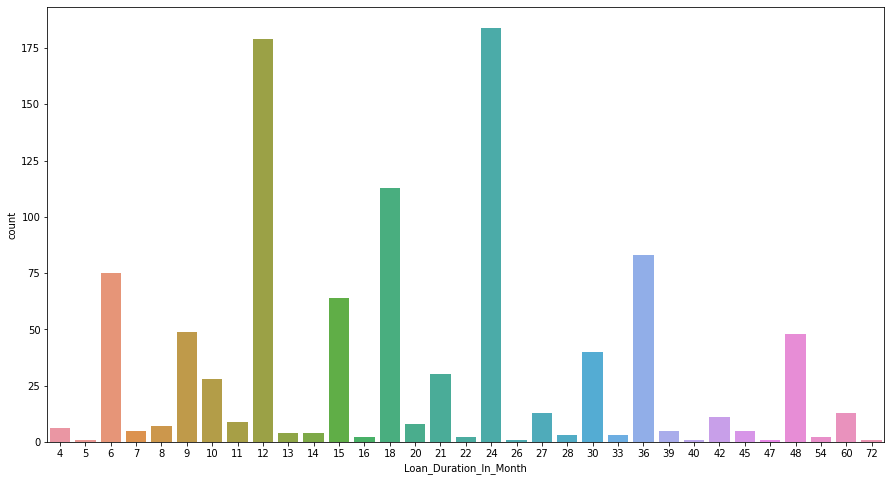

In [12]:
plt.figure(figsize=(15,8))
sns.countplot('Loan_Duration_In_Month',data=df_credit)

**Interpretation:**Here we see that 12 and 24 month loan duration that loan customer take more.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

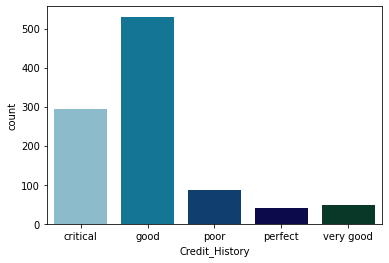

In [13]:
sns.countplot('Credit_History',palette='ocean_r',data=df_credit)

**Interpretation:**Here we see that good credit history is more i.e. existing credit paid back duly till now is more compare to other so, this is good for bank.

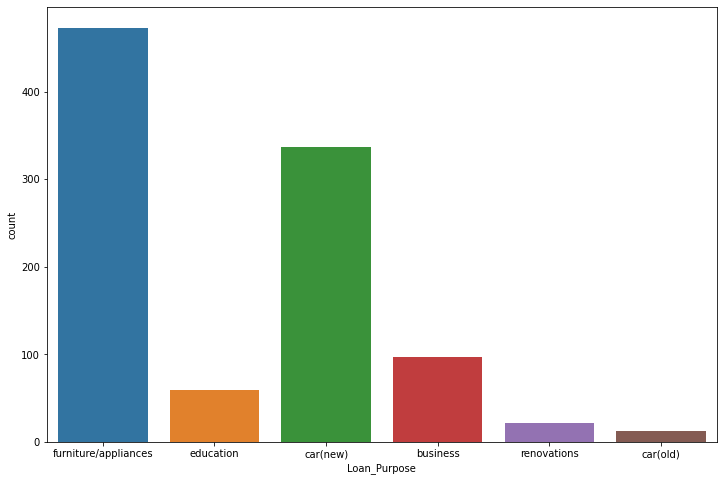

In [19]:
plt.figure(figsize=(12,8))
ax=sns.countplot('Loan_Purpose',data=df_credit)

**Interpretation:** Furniture/Appliances loan Purpose is more.

<AxesSubplot:xlabel='Credit_Amount', ylabel='Count'>

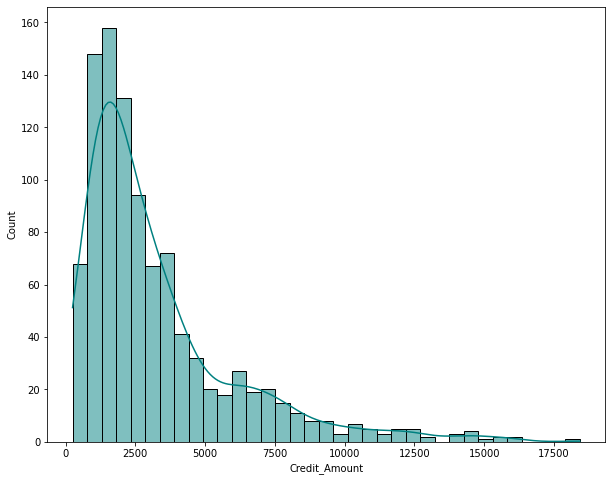

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(x='Credit_Amount',color='teal',kde=True,data=df_credit)

**Interpretation:**Installment Credit_Amount mostly between 1000 to 3000.

<AxesSubplot:xlabel='Saving_Account_Balance', ylabel='count'>

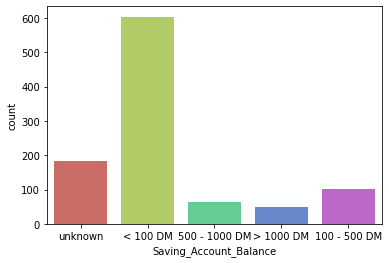

In [21]:
sns.countplot('Saving_Account_Balance',palette='hls',data=df_credit)

**Interpretation:**Saving account balance normal range is <100 DM

<AxesSubplot:xlabel='Present_Employment_Since', ylabel='count'>

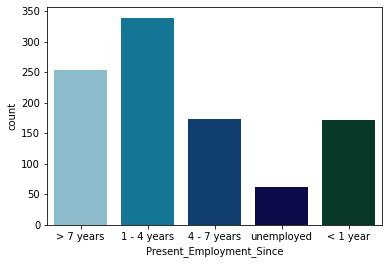

In [22]:
sns.countplot('Present_Employment_Since',palette='ocean_r',data=df_credit)

**Interpretation:**1-4 year employment people take loan more that means may be beginer take loan for car or home

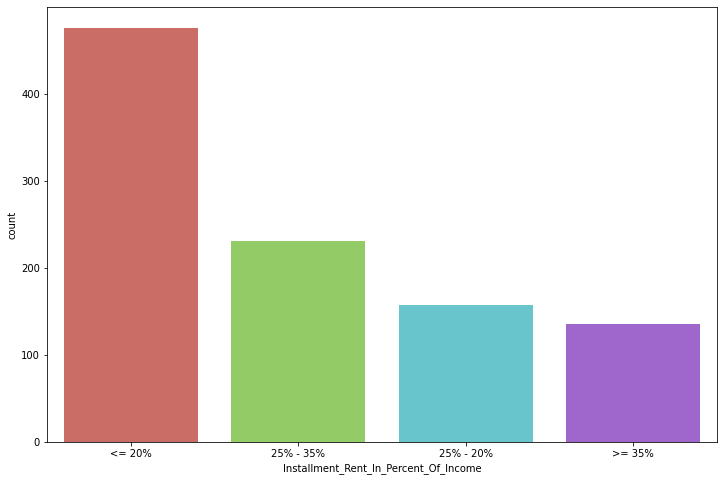

In [26]:
plt.figure(figsize=(12,8))
ax=sns.countplot('Installment_Rent_In_Percent_Of_Income',palette='hls',data=df_credit)

**Interpretation:**Less than 20% installment rate take from the disposable income customer more.

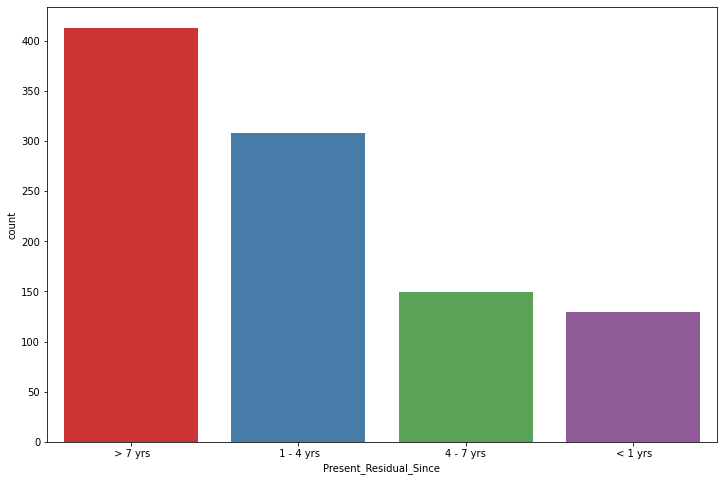

In [28]:
plt.figure(figsize=(12,8))
ax=sns.countplot('Present_Residual_Since',palette='Set1',data=df_credit)

**Interpretation:**More than 7 year residual customer more.

<AxesSubplot:xlabel='Age', ylabel='Density'>

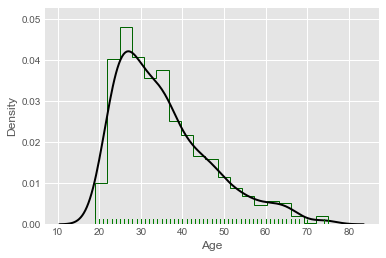

In [111]:
#plt.style.use("ggplot")

sns.distplot(df_credit.Age,rug=True,rug_kws={'color':'g'},kde_kws={'color':'black'},hist_kws={'histtype':'step','linewidth':1,'alpha':1,'color':'darkgreen'})

**Interpretation:**Positive skewed graph and 25 to 35 age group customer take more loan

<AxesSubplot:xlabel='Other_Installment_Plans', ylabel='count'>

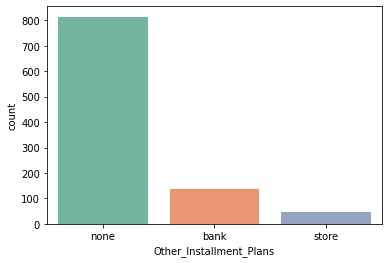

In [15]:
sns.countplot('Other_Installment_Plans',palette='Set2',data=df_credit)

**Interpretation:**Mostly customer take 1 loan at that time, few customer take more than 1 loan.

<AxesSubplot:xlabel='Housing_Status', ylabel='count'>

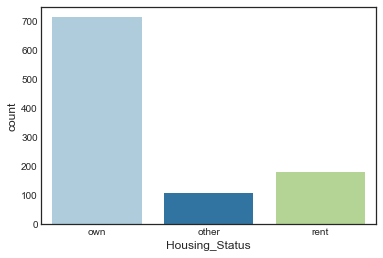

In [141]:
sns.countplot('Housing_Status',palette='Paired',data=df_credit)

**Interpretation:**70% customer have own house

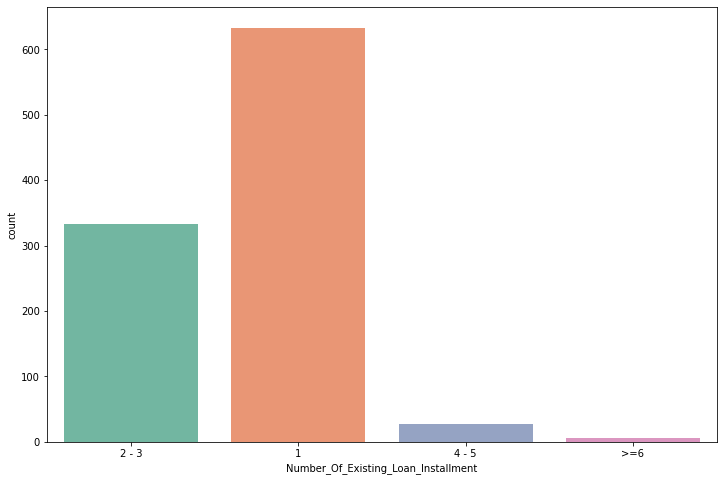

In [29]:
plt.figure(figsize=(12,8))
ax=sns.countplot('Number_Of_Existing_Loan_Installment',palette='Set2',data=df_credit)

**Interpretation:**

<AxesSubplot:xlabel='Job', ylabel='count'>

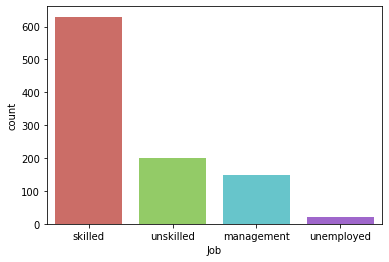

In [17]:
sns.countplot('Job',palette='hls',data=df_credit)

**Interpretation:** Skilled status job customer take more loan may be that have get monthly income regulerly so that capable pay to loan installment easily.

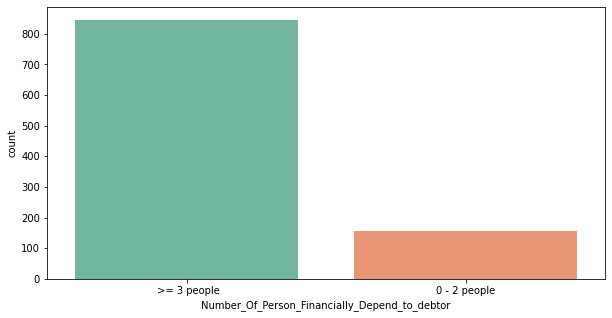

In [30]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Number_Of_Person_Financially_Depend_to_debtor',palette='Set2',data=df_credit)

**Interpretation:** 3 or more person financially depend to debtor count more.May be they pay installment late.

<AxesSubplot:xlabel='Phone_Have_Or_Not', ylabel='count'>

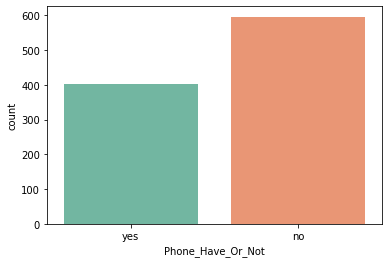

In [23]:
sns.countplot('Phone_Have_Or_Not',palette='Set2',data=df_credit)

**Interpretation:** 60% customer have not phone because this 1790s data so may be people have not carry phone that time.

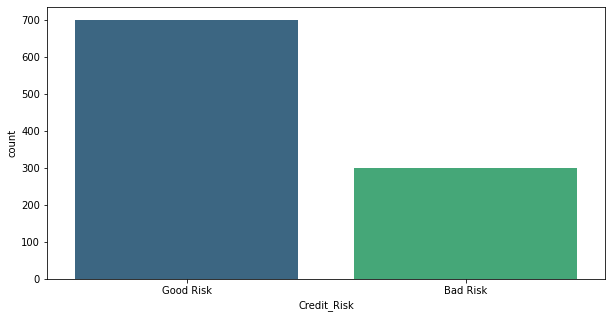

In [31]:
plt.figure(figsize=(10,5))
ax=sns.countplot('Credit_Risk',palette="viridis",data=df_credit)

**Interpretation:**Good Risk is 70% and bad risk is 30%

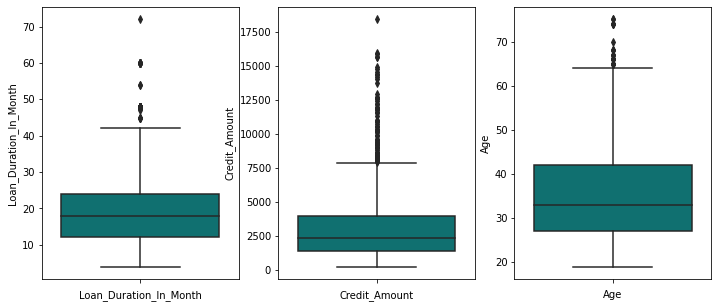

In [19]:
df_num = df_credit.select_dtypes(include=[np.number])
fig, ax = plt.subplots(1,3,figsize=(12, 5))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(y = df_num[variable], orient = "v",whis=1.5 , ax=subplot,color='teal') 
    z.set_xlabel(variable, fontsize = 10)                                     

# Bivariate Analysis

In [31]:
# Bivariate Analysis
def visualize_distribution(attr):
    good_risk_df = df_credit[df_credit["Credit_Risk"]=="Good Risk"]
    bad_risk_df = df_credit[df_credit["Credit_Risk"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Credit_Risk']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Credit_Risk']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Credit_Risk'].index.tolist(), attr_good_risk_df['Credit_Risk'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Credit_Risk'].index.tolist(), attr_bad_risk_df['Credit_Risk'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Credit_Risk'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Credit_Risk'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Credit_Risk'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Credit_Risk'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()
   

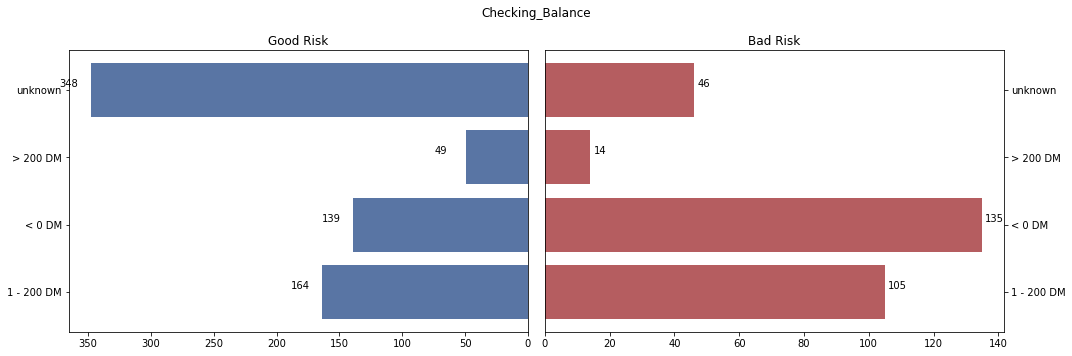

In [32]:
visualize_distribution("Checking_Balance")

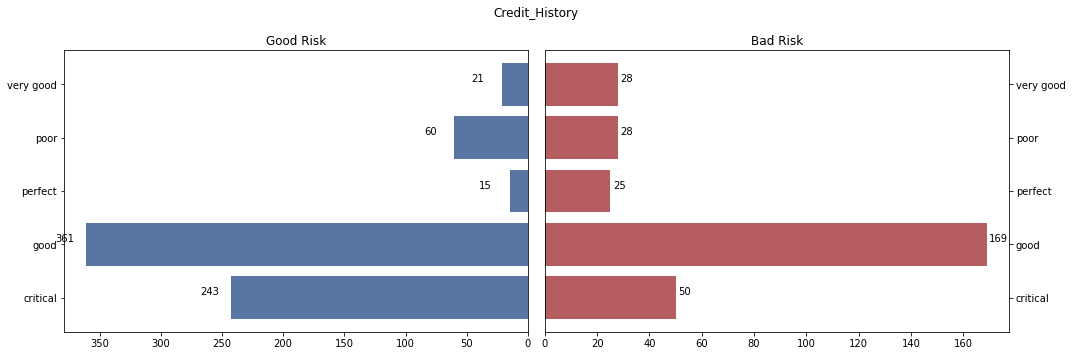

In [10]:
visualize_distribution("Credit_History")

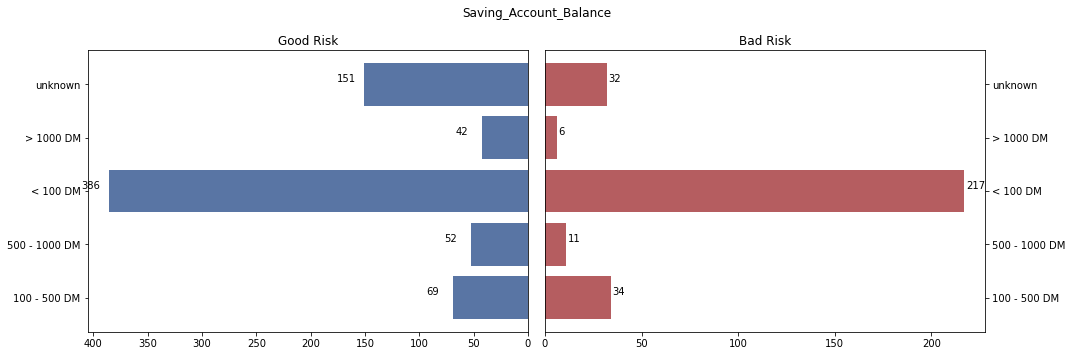

In [11]:
visualize_distribution("Saving_Account_Balance")

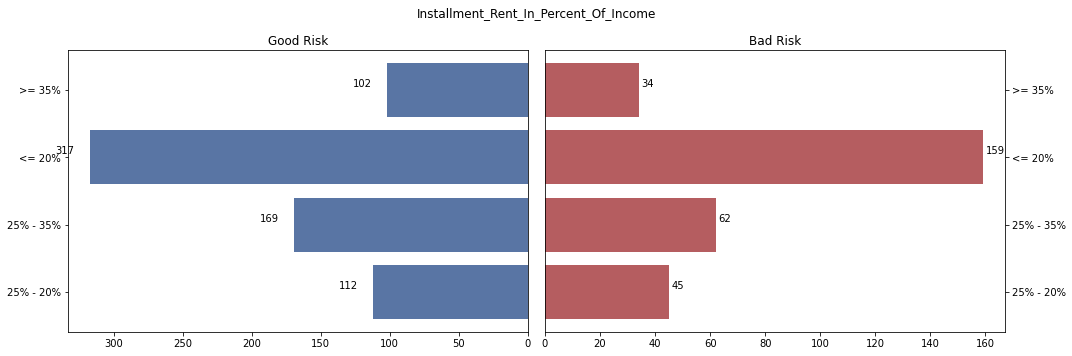

In [33]:
visualize_distribution("Installment_Rent_In_Percent_Of_Income")

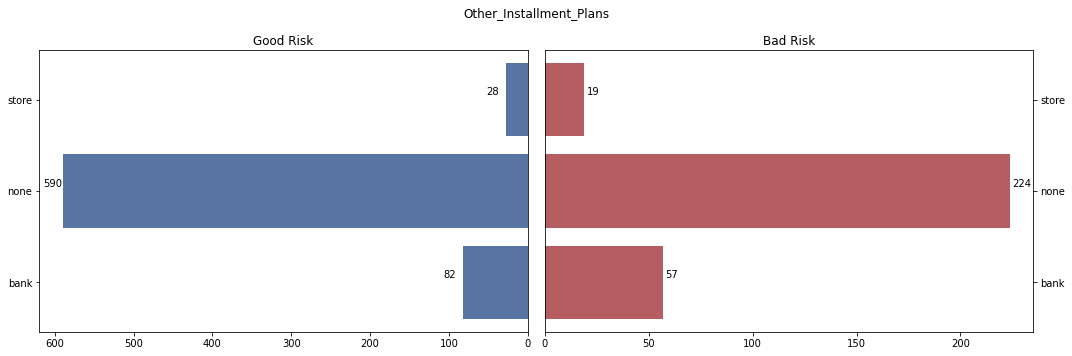

In [37]:
visualize_distribution("Other_Installment_Plans")

<AxesSubplot:xlabel='Loan_Duration_In_Month', ylabel='Credit_Amount'>

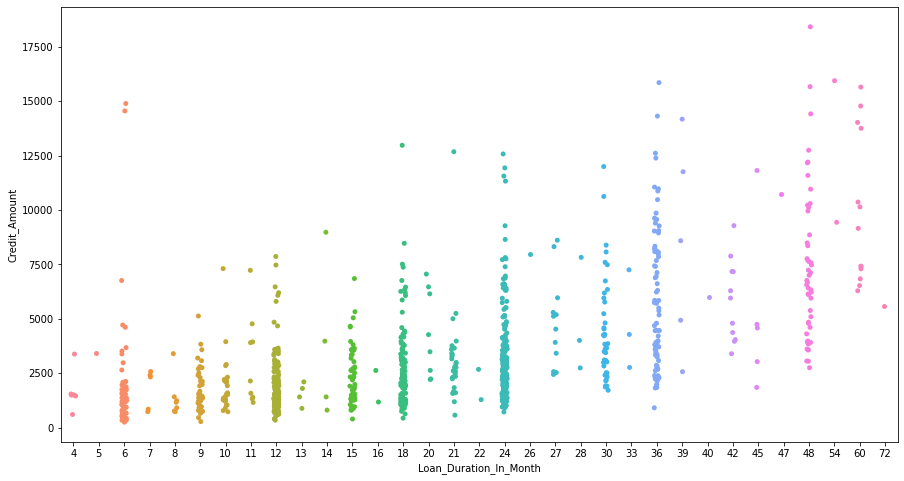

In [52]:
plt.figure(figsize=(15,8))
sns.stripplot(x='Loan_Duration_In_Month',y='Credit_Amount',data=df_credit)

**Interpretation:**We see that credit amount increase when loan duration increase

In [20]:
df_credit.head()

,Checking_Balance,Loan_Duration_In_Month,Credit_History,Loan_Purpose,Credit_Amount,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Age,Other_Installment_Plans,Housing_Status,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Phone_Have_Or_Not,Credit_Risk
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,<= 20%,> 7 yrs,67,none,own,2 - 3,skilled,>= 3 people,yes,Good Risk
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,25% - 35%,1 - 4 yrs,22,none,own,1,skilled,>= 3 people,no,Bad Risk
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,25% - 35%,4 - 7 yrs,49,none,own,1,unskilled,0 - 2 people,no,Good Risk
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,25% - 35%,> 7 yrs,45,none,other,1,skilled,0 - 2 people,no,Good Risk
4,< 0 DM,24,poor,car(new),4870,< 100 DM,1 - 4 years,25% - 20%,> 7 yrs,53,none,other,2 - 3,skilled,0 - 2 people,no,Bad Risk


In [ ]:
#credit history and age
# age and phone
#Credit_History and Housing_Status
#Credit_History and Number_Of_Person_Financially_Depend_to_debtor

<AxesSubplot:xlabel='Phone_Have_Or_Not', ylabel='Age'>

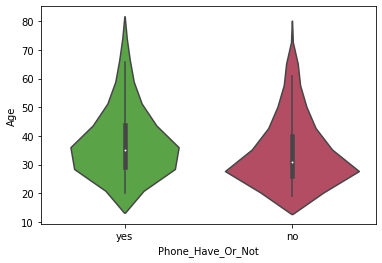

In [5]:
sns.violinplot(x='Phone_Have_Or_Not',y='Age',palette='prism',gridsize=10,saturation=0.40,data=df_credit)

<AxesSubplot:xlabel='Housing_Status', ylabel='Credit_Amount'>

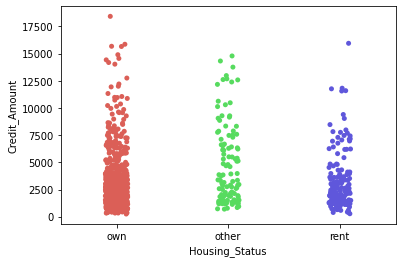

In [6]:
sns.stripplot(x='Housing_Status',y='Credit_Amount',palette='hls',data=df_credit)

<Figure size 1080x1440 with 0 Axes>

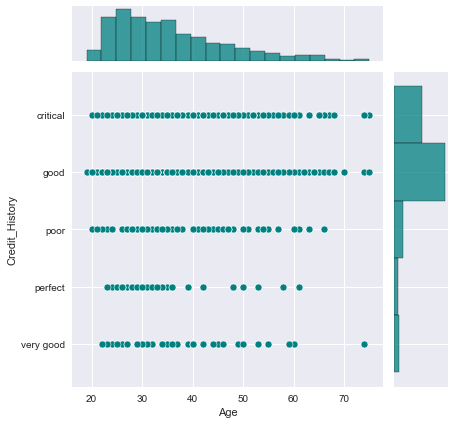

In [8]:
plt.style.use("seaborn")
plt.figure(figsize=(15,20))
sns.jointplot(x='Age',y='Credit_History',color='teal',data=df_credit)

<AxesSubplot:xlabel='Number_Of_Person_Financially_Depend_to_debtor', ylabel='Credit_Amount'>

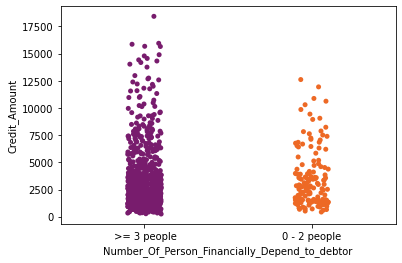

In [6]:
#plt.style.use("seaborn-talk")
sns.stripplot(x='Number_Of_Person_Financially_Depend_to_debtor',y='Credit_Amount',palette='inferno',data=df_credit)

# Multivariant Analysis

<AxesSubplot:>

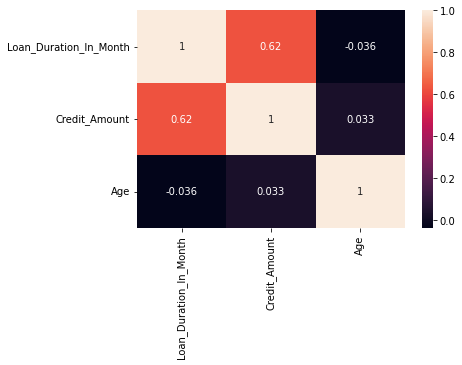

In [7]:
sns.heatmap(df_credit.corr(),annot=True)

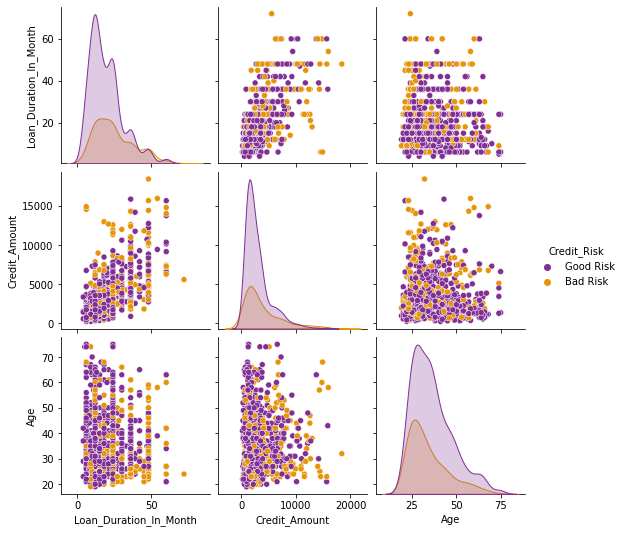

In [24]:
sns.pairplot(hue='Credit_Risk',palette='CMRmap',data=df_credit)

<AxesSubplot:xlabel='Installment_Rent_In_Percent_Of_Income', ylabel='Credit_Amount'>

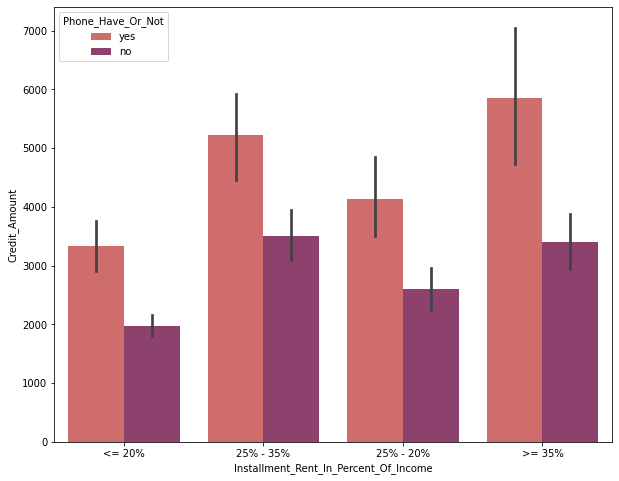

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(x='Installment_Rent_In_Percent_Of_Income',y='Credit_Amount',hue='Phone_Have_Or_Not',palette='flare',data=df_credit)

In [60]:
date_int = ["Loan_Purpose", 'Checking_Balance','Saving_Account_Balance']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]],df_credit[date_int[1]]).style.background_gradient(cmap = cm)


Checking_Balance,1 - 200 DM,< 0 DM,> 200 DM,unknown
Loan_Purpose,,,,
business,40,15,5,37
car(new),81,104,18,134
car(old),7,4,0,1
education,16,15,4,24
furniture/appliances,116,131,36,190
renovations,9,5,0,8


In [54]:
pd.crosstab(df_credit[date_int[0]],df_credit[date_int[2]]).style.background_gradient(cmap = cm)

Saving_Account_Balance,100 - 500 DM,500 - 1000 DM,< 100 DM,> 1000 DM,unknown
Loan_Purpose,,,,,
business,17,4,56,6,14
car(new),39,18,188,18,74
car(old),2,0,8,0,2
education,5,3,34,2,15
furniture/appliances,37,37,303,20,76
renovations,3,1,14,2,2


# Filter numerical and categorical variables

In [61]:
#categorical
df_Cat=df_credit.select_dtypes(include=['object'])
df_Cat.head()

#numeric
df_num=df_credit.select_dtypes(include=['number']).reset_index(drop=True)
df_num.head()

,Loan_Duration_In_Month,Credit_Amount,Age
0,6,1169,67
1,48,5951,22
2,12,2096,49
3,42,7882,45
4,24,4870,53


# Encode Data

In [62]:
df_LabelEncode=df_Cat[['Checking_Balance','Credit_History','Saving_Account_Balance','Present_Employment_Since',
                       'Installment_Rent_In_Percent_Of_Income',
                       'Present_Residual_Since','Number_Of_Existing_Loan_Installment','Job',
                       'Number_Of_Person_Financially_Depend_to_debtor']]
df_LabelEncode.head()

,Checking_Balance,Credit_History,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor
0,< 0 DM,critical,unknown,> 7 years,<= 20%,> 7 yrs,2 - 3,skilled,>= 3 people
1,1 - 200 DM,good,< 100 DM,1 - 4 years,25% - 35%,1 - 4 yrs,1,skilled,>= 3 people
2,unknown,critical,< 100 DM,4 - 7 years,25% - 35%,4 - 7 yrs,1,unskilled,0 - 2 people
3,< 0 DM,good,< 100 DM,4 - 7 years,25% - 35%,> 7 yrs,1,skilled,0 - 2 people
4,< 0 DM,poor,< 100 DM,1 - 4 years,25% - 20%,> 7 yrs,2 - 3,skilled,0 - 2 people


In [63]:
import category_encoders as ce
#Checking_Balance
encoder= ce.OrdinalEncoder(cols=['Checking_Balance'],return_df=True,
                           mapping=[{'col':'Checking_Balance',
'mapping':{'unknown':0,'< 0 DM':1,'1 - 200 DM':2,'> 200 DM':3}}])
df_LabelEncode.Checking_Balance=encoder.fit_transform(df_LabelEncode.Checking_Balance)

#Credit_History
encoder= ce.OrdinalEncoder(cols=['Credit_History'],return_df=True,
                           mapping=[{'col':'Credit_History',
'mapping':{'critical':0,'poor':1,'good':2,'very good':3,'perfect':4}}])
df_LabelEncode.Credit_History=encoder.fit_transform(df_LabelEncode.Credit_History)

#Saving_Account_Balance
encoder= ce.OrdinalEncoder(cols=['Saving_Account_Balance'],return_df=True,
                           mapping=[{'col':'Saving_Account_Balance',
'mapping':{'unknown':0,'< 100 DM':1,'500 - 1000 DM':2,'> 1000 DM':3,'100 - 500 DM':4}}])
df_LabelEncode.Saving_Account_Balance=encoder.fit_transform(df_LabelEncode.Saving_Account_Balance)

#Present_Employment_Since
encoder= ce.OrdinalEncoder(cols=['Present_Employment_Since'],return_df=True,
                           mapping=[{'col':'Present_Employment_Since',
'mapping':{'unemployed':0,'< 1 year':1,'1 - 4 years':2,'4 - 7 years':3,'> 7 years':4}}])
df_LabelEncode.Present_Employment_Since=encoder.fit_transform(df_LabelEncode.Present_Employment_Since)

#Installment_Rent_In_Percent_Of_Income
encoder= ce.OrdinalEncoder(cols=['Installment_Rent_In_Percent_Of_Income'],return_df=True,
                           mapping=[{'col':'Installment_Rent_In_Percent_Of_Income',
'mapping':{'<= 20%':0,'25% - 35%':1,'25% - 20%':2,'>= 35%':3}}])
df_LabelEncode.Installment_Rent_In_Percent_Of_Income=encoder.fit_transform(df_LabelEncode.Installment_Rent_In_Percent_Of_Income)

#Present_Residual_Since
encoder= ce.OrdinalEncoder(cols=['Present_Residual_Since'],return_df=True,
                           mapping=[{'col':'Present_Residual_Since',
'mapping':{' < 1 yrs':0,' 1 - 4 yrs':1,'4 - 7 yrs':2,' > 7 yrs':3}}])
df_LabelEncode.Present_Residual_Since=encoder.fit_transform(df_LabelEncode.Present_Residual_Since)

#Number_Of_Existing_Loan_Installment
encoder= ce.OrdinalEncoder(cols=['Number_Of_Existing_Loan_Installment'],return_df=True,
                           mapping=[{'col':'Number_Of_Existing_Loan_Installment',
'mapping':{'1' :0,'2 - 3':1,'4 - 5':2,'>=6':3}}])
df_LabelEncode.Number_Of_Existing_Loan_Installment=encoder.fit_transform(df_LabelEncode.Number_Of_Existing_Loan_Installment)

#Job
encoder= ce.OrdinalEncoder(cols=['Job'],return_df=True,
                           mapping=[{'col':'Job',
'mapping':{'unemployed' :0,'unskilled':1,'management':2,'skilled':3}}])
df_LabelEncode.Job=encoder.fit_transform(df_LabelEncode.Job)

#Number_Of_Person_Financially_Depend_to_debtor
encoder= ce.OrdinalEncoder(cols=['Number_Of_Person_Financially_Depend_to_debtor'],return_df=True,
                           mapping=[{'col':'Number_Of_Person_Financially_Depend_to_debtor',
'mapping':{'0 - 2 people' :0,' >= 3 people':1}}])
df_LabelEncode.Number_Of_Person_Financially_Depend_to_debtor=encoder.fit_transform(df_LabelEncode.Number_Of_Person_Financially_Depend_to_debtor)


df_LabelEncode.head(10)

,Checking_Balance,Credit_History,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor
0,1,0,0,4,0,3,1,3,1
1,2,2,1,2,1,1,0,3,1
2,0,0,1,3,1,2,0,1,0
3,1,2,1,3,1,3,0,3,0
4,1,1,1,2,2,3,1,3,0
5,0,2,0,2,1,3,0,1,0
6,0,2,2,4,2,3,0,3,1
7,2,2,1,2,1,1,0,2,1
8,0,2,3,3,1,3,0,1,1
9,2,0,1,0,0,1,1,2,1


In [13]:
#pip install category_encoders

In [64]:
df_DummyEncode=df_Cat[['Loan_Purpose','Other_Installment_Plans','Housing_Status','Phone_Have_Or_Not','Credit_Risk']]
encode_data=pd.get_dummies(data = df_DummyEncode, drop_first=True).reset_index(drop=True)
encode_data.head()

,Loan_Purpose_car(new),Loan_Purpose_car(old),Loan_Purpose_education,Loan_Purpose_furniture/appliances,Loan_Purpose_renovations,Other_Installment_Plans_none,Other_Installment_Plans_store,Housing_Status_own,Housing_Status_rent,Phone_Have_Or_Not_yes,Credit_Risk_Good Risk
0,0,0,0,1,0,1,0,1,0,1,1
1,0,0,0,1,0,1,0,1,0,0,0
2,0,0,1,0,0,1,0,1,0,0,1
3,0,0,0,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0


In [65]:
#concat all data
df_concat=pd.concat([df_num,df_LabelEncode,encode_data],axis=1)
df_concat.reset_index(drop=True)
df_concat.head()

,Loan_Duration_In_Month,Credit_Amount,Age,Checking_Balance,Credit_History,Saving_Account_Balance,Present_Employment_Since,Installment_Rent_In_Percent_Of_Income,Present_Residual_Since,Number_Of_Existing_Loan_Installment,Job,Number_Of_Person_Financially_Depend_to_debtor,Loan_Purpose_car(new),Loan_Purpose_car(old),Loan_Purpose_education,Loan_Purpose_furniture/appliances,Loan_Purpose_renovations,Other_Installment_Plans_none,Other_Installment_Plans_store,Housing_Status_own,Housing_Status_rent,Phone_Have_Or_Not_yes,Credit_Risk_Good Risk
0,6,1169,67,1,0,0,4,0,3,1,3,1,0,0,0,1,0,1,0,1,0,1,1
1,48,5951,22,2,2,1,2,1,1,0,3,1,0,0,0,1,0,1,0,1,0,0,0
2,12,2096,49,0,0,1,3,1,2,0,1,0,0,0,1,0,0,1,0,1,0,0,1
3,42,7882,45,1,2,1,3,1,3,0,3,0,0,0,0,1,0,1,0,0,0,0,1
4,24,4870,53,1,1,1,2,2,3,1,3,0,1,0,0,0,0,1,0,0,0,0,0


In [66]:
#drop target variable
df_target=df_concat['Credit_Risk_Good Risk']
df_concat=df_concat.drop('Credit_Risk_Good Risk',axis=1)

In [67]:
df_concat.isnull().sum()

Loan_Duration_In_Month                           0
Credit_Amount                                    0
Age                                              0
Checking_Balance                                 0
Credit_History                                   0
Saving_Account_Balance                           0
Present_Employment_Since                         0
Installment_Rent_In_Percent_Of_Income            0
Present_Residual_Since                           0
Number_Of_Existing_Loan_Installment              0
Job                                              0
Number_Of_Person_Financially_Depend_to_debtor    0
Loan_Purpose_car(new)                            0
Loan_Purpose_car(old)                            0
Loan_Purpose_education                           0
Loan_Purpose_furniture/appliances                0
Loan_Purpose_renovations                         0
Other_Installment_Plans_none                     0
Other_Installment_Plans_store                    0
Housing_Status_own             

# Train Test Split

In [68]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_full = df_concat.copy()
y_full = df_target.copy()

X_full = sm.add_constant(X_full)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (700, 23)
y_train_full (700,)
X_test_full (300, 23)
y_test_full (300,)


# Make Base Model

In [69]:
from sklearn.tree import DecisionTreeClassifier
desicion_tree=DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_model=desicion_tree.fit(X_train_full,y_train_full)

In [70]:
predict_train=decision_model.predict(X_train_full)
#predict_train
predict_test=decision_model.predict(X_test_full)
#predict_test

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_full,predict_train)

array([[214,   0],
       [  0, 486]], dtype=int64)

In [72]:
confusion_matrix(y_test_full,predict_test)

array([[ 38,  48],
       [ 52, 162]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train_full,predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       486

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [74]:
print(classification_report(y_test_full,predict_test))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        86
           1       0.77      0.76      0.76       214

    accuracy                           0.67       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.67      0.67      0.67       300



In [ ]:
# here we see that in train data model accuracy is 1 and test data model accuracy is 0.67 i.e model face overfitting prb
# so we use grid search cv

In [75]:
tuned_parameter=[{'criterion':['entropy','gini'],
                 'max_depth':range(2,10),
                  'max_features':['sqrt','log2'],
                 'min_samples_split':range(2,10),
                 'min_samples_leaf':range(1,10),
                 'max_leaf_nodes':range(1,10)}]
decision=DecisionTreeClassifier(random_state=10)

In [76]:
from sklearn.model_selection import GridSearchCV
tree_grid=GridSearchCV(estimator=decision,param_grid=tuned_parameter,cv=5)

In [77]:
tree_grid_model=tree_grid.fit(X_train_full,y_train_full)

In [78]:
print(tree_grid_model.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Final Model

In [24]:
dt3=DecisionTreeClassifier(criterion='gini', max_depth= 3, max_features='sqrt', 
                           max_leaf_nodes= 8, min_samples_leaf= 1, min_samples_split= 2)

In [26]:
dt=dt3.fit(X_train_full,y_train_full)

In [27]:
predict1_train=dt.predict(X_train_full)
predict1_train.shape
predict1_test=dt.predict(X_test_full)
predict1_test.shape

(300,)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_train_full,predict1_train))

              precision    recall  f1-score   support

           0       0.55      0.10      0.17       214
           1       0.71      0.96      0.82       486

    accuracy                           0.70       700
   macro avg       0.63      0.53      0.49       700
weighted avg       0.66      0.70      0.62       700



In [29]:
print(classification_report(y_test_full,predict1_test))

              precision    recall  f1-score   support

           0       0.42      0.09      0.15        86
           1       0.72      0.95      0.82       214

    accuracy                           0.70       300
   macro avg       0.57      0.52      0.49       300
weighted avg       0.64      0.70      0.63       300



**Interpretation:**After GridSearchCV overfitting problem is remove and get 70% acuuracy.

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_classification=RandomForestClassifier(n_estimators=10,random_state=10)
rf_model_train=rf_classification.fit(X_train_full,y_train_full)

In [80]:
rf_model_test=rf_classification.fit(X_test_full,y_test_full)

In [82]:
predict_rf_train=rf_model_train.predict(X_train_full)
predict_rf_test=rf_model_test.predict(X_test_full)

In [83]:
print(classification_report(y_train_full,predict_rf_train))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       214
           1       0.75      0.81      0.78       486

    accuracy                           0.69       700
   macro avg       0.62      0.60      0.61       700
weighted avg       0.67      0.69      0.68       700



In [84]:
print(classification_report(y_test_full,predict_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00       214

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [85]:
tuned_params=[{'criterion':['entopy','gini'],'max_depth':[10,20,30],
               'max_features':['log2','sqrt'],'min_samples_split':[2,5,8,11],
               'min_samples_leaf':[1,5,9],'n_estimators':[10,30,50,70]}]
rfc=RandomForestClassifier(random_state=10)

In [86]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfc,param_grid=tuned_params,cv=5)
tree_grid_model=rf_grid.fit(X_train_full,y_train_full)

In [87]:
print(tree_grid_model.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 30}


In [88]:
dt3=RandomForestClassifier(criterion='gini', max_depth= 20, max_features='log2', 
                          min_samples_leaf= 1, min_samples_split= 11,n_estimators=30)
rf_model_new=dt3.fit(X_train_full,y_train_full)

In [89]:
predict1_train=rf_model_new.predict(X_train_full)
predict1_train.shape

predict1_test=rf_model_new.predict(X_test_full)
predict1_test.shape

(300,)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_train_full,predict1_train))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       214
           1       0.90      0.99      0.95       486

    accuracy                           0.92       700
   macro avg       0.94      0.88      0.90       700
weighted avg       0.93      0.92      0.92       700



In [91]:
print(classification_report(y_test_full,predict1_test))

              precision    recall  f1-score   support

           0       0.67      0.28      0.39        86
           1       0.77      0.94      0.85       214

    accuracy                           0.75       300
   macro avg       0.72      0.61      0.62       300
weighted avg       0.74      0.75      0.72       300

